In [1]:
import os
import time

from pyscf import gto, scf
from projectorEmbedding import embedding_procedure
from projectorEmbedding.embed_partition import mulliken_partition

start_time = time.time()

water = """
O          0.00000        0.000      0.115
H          0.00000        0.754     -0.459
H1          0.00000       -0.754     -0.459
"""

Iron = """
Fe                    0.00000000     0.00000000     0.00000000
C                    -1.81917027    -0.03335831    -0.71926660
N                    -2.91104648    -0.05028038    -1.14336000
C                    -0.26363647     1.81748256     0.66107639
N                    -0.39650765     2.91674740     1.04361053
C                    -0.65245477    -0.72431645     1.71356864
N                    -1.01949658    -1.14265108     2.74378932
C                     0.26492194    -1.81715092    -0.66122605
N                     0.39946334    -2.91608401    -1.04407649
C                     0.65377106     0.72497185    -1.71283131
N                     1.02222110     1.14453278    -2.74209377
C                     1.81942656     0.03289085     0.71938992
N                     2.91151676     0.04957108     1.14269602
    """


complex1 = """
V          5.34800        8.22940        9.95180                                
C          4.83030        9.96040        8.89490                                
C          3.75140        6.88460        9.79650                                
C          5.59960        8.73400       11.96610                                
C          7.05430        7.30710        9.15770                                
C          5.47230       10.28360        7.69410                                
H          6.20920        9.75000        7.41950                                
C          5.08920       11.34560        6.88210                                
H          5.55020       11.52510        6.07140                                
C          4.02610       12.13490        7.27450                                
H          3.73800       12.85360        6.72410                                
C          3.38500       11.87760        8.46430                                
H          2.66760       12.43810        8.73610                                
C          3.76250       10.81770        9.27580                                
C          3.05790       10.58760       10.59350                                
H          2.73890        9.66260       10.63660                                
H          2.29580       11.20000       10.66720                                
H          3.68180       10.75330       11.33090                                
C          2.54390        7.32670        9.22530                                
H          2.50290        8.20460        8.86450                                
C          1.41770        6.53300        9.17020                                
H          0.61550        6.86810        8.78790                                
C          1.46240        5.25030        9.67220                                
H          0.68840        4.70000        9.64150                                
C          2.64020        4.76520       10.22260                                
H          2.67140        3.87850       10.56210                                
C          3.76900        5.56240       10.28060                                
C          5.03430        4.99640       10.87630                                
H          5.73480        4.97230       10.19200                                
H          4.86360        4.08780       11.20170                                
H          5.32480        5.56140       11.62240                                
C          4.76890        8.10770       12.91990                                
H          4.17870        7.42100       12.63130                                
C          4.78070        8.45510       14.25500                                
H          4.21140        8.00880       14.87100                                
C          5.62490        9.45560       14.68830                                
H          5.63460        9.70910       15.60360                                
C          6.45620       10.08490       13.78300                                
H          7.04020       10.77090       14.08490                                
C          6.45300        9.73440       12.43660                                
C          7.38200       10.45950       11.48660                                
H          7.68040       11.29740       11.89720                                
H          6.90810       10.65480       10.65140                                
H          8.15990        9.89390       11.29600                                
C          8.16850        7.10050        9.99920                                
H          8.12970        7.41880       10.89350                                
C          9.31520        6.45170        9.57240                                
H         10.04710        6.33300       10.16600                                
C          9.38560        5.98000        8.27760                                
H         10.17160        5.54070        7.97280                                
C          8.31480        6.14590        7.42920                                
H          8.36660        5.81650        6.53950                                
C          7.15740        6.78950        7.85750                                
C          5.99860        6.92540        6.89520                                
H          6.25070        7.52520        6.16290                                
H          5.22330        7.29290        7.36750                                
H          5.77170        6.04340        6.53160
"""

complex2 = """
Mo         5.92450        5.92450        3.94650                                
C          4.17800        5.61050        2.78710                                
C          3.03690        6.37710        3.09570                                
H          3.09220        7.05450        3.76000                                
C          1.82360        6.15440        2.43580                                
H          1.06170        6.68190        2.64260                                
C          1.74300        5.15910        1.48070                                
H          0.91400        4.98190        1.05220                                
C          2.86390        4.41970        1.14450                                
H          2.79960        3.75100        0.47320                                
C          4.09030        4.64360        1.77830                                
C          5.30010        3.89710        1.32050                                
H          5.95050        4.52740        0.94620                                
H          5.04200        3.24770        0.63340                                
H          5.70060        3.42690        2.08080                                
C          7.67100        6.23850        2.78710                                
C          8.81210        5.47190        3.09570                                
H          8.75680        4.79450        3.76000                                
C         10.02540        5.69460        2.43580                                
H         10.78730        5.16710        2.64260                                
C         10.10600        6.68990        1.48070                                
H         10.93500        6.86710        1.05220                                
C          8.98510        7.42930        1.14450                                
H          9.04940        8.09800        0.47320                                
C          7.75870        7.20540        1.77830                                
C          6.54890        7.95190        1.32050                                
H          5.89850        7.32160        0.94620                                
H          6.80700        8.60130        0.63340                                
H          6.14840        8.42210        2.08080                                
C          5.61050        7.67100        5.10600                                
C          6.37710        8.81210        4.79740                                
H          7.05450        8.75680        4.13310                                
C          6.15440       10.02540        5.45730                                
H          6.68190       10.78730        5.25050                                
C          5.15910       10.10600        6.41240                                
H          4.98190       10.93500        6.84090                                
C          4.41970        8.98510        6.74860                                
H          3.75100        9.04940        7.41990                                
C          4.64360        7.75870        6.11480                                
C          3.89710        6.54890        6.57260                                
H          4.52740        5.89850        6.94690                                
H          3.24770        6.80700        7.25970                                
H          3.42690        6.14840        5.81230                                
C          6.23850        4.17800        5.10600                                
C          5.47190        3.03690        4.79740                                
H          4.79450        3.09220        4.13310                                
C          5.69460        1.82360        5.45730                                
H          5.16710        1.06170        5.25050                                
C          6.68990        1.74300        6.41240                                
H          6.86710        0.91400        6.84090                                
C          7.42930        2.86390        6.74860                                
H          8.09800        2.79960        7.41990                                
C          7.20540        4.09030        6.11480                                
C          7.95190        5.30010        6.57260                                
H          7.32160        5.95050        6.94690                                
H          8.60130        5.04200        7.25970                                
H          8.42210        5.70060        5.81230 
"""

complex4 = """
Cr         8.00940       15.16000        8.33100                                
C          9.77950       15.29670        9.23370                                
C          7.68320       18.00440        8.72990                                
H          8.56330       17.91140        9.07480                                
C         10.04640       15.72710       10.53250                                
C          7.00720       13.78410        9.36330                                
C          7.01270       16.87370        8.28050                                
C         12.40040       15.28860       10.16620                                
H         13.29260       15.30170       10.49230                                
C          5.87640       14.27490       10.08150                                
H          5.67650       15.20260       10.05560                                
C          5.71410       17.01880        7.74780                                
C          7.32240       12.42680        9.46410                                
C         10.85430       14.82890        8.42280                                
H         10.67380       14.51380        7.54560                                
C          8.84010       15.54530        5.45900                                
C         11.37910       15.72840       10.96760                                
H         11.58130       16.04380       11.84070                                
C          8.96470       16.17390       11.46020                                
H          8.73710       17.10790       11.27100                                
H          9.27380       16.09340       12.38620                                
H          8.17120       15.61220       11.33090                                
C          5.82170       19.39430        8.19890                                
H          5.40980       20.25090        8.17510                                
C          8.19270       14.71470        6.39470                                
C          5.13270       18.28810        7.74460                                
H          4.24510       18.39280        7.42420                                
C         12.14930       14.82610        8.89150                                
H         12.85790       14.51030        8.34380                                
C          6.46920       11.59050       10.19820                                
H          6.66140       10.66170       10.24870                                
C          4.94390       15.87380        7.15120                                
H          5.52660       15.08840        7.08140                                
H          4.62480       16.12360        6.25910                                
H          4.17780       15.66130        7.72460                                
C          7.56410       13.55000        5.95480                                
H          7.10730       13.00200        6.58290                                
C          7.10530       19.26600        8.68830                                
H          7.58650       20.02680        8.99160                                
C          8.21910       13.97280        3.71240                                
H          8.23720       13.71420        2.79900                                
C          5.35540       12.08510       10.84600                                
H          4.77980       11.49580       11.32080                                
C          8.82690       15.14890        4.10580                                
H          9.24370       15.70020        3.45280                                
C          9.51590       16.83840        5.83810                                
H          8.87000       17.42760        6.27900                                
H          9.86000       17.27560        5.03080                                
H         10.25900       16.65130        6.44930                                
C          7.59050       13.17620        4.62890                                
H          7.17240       12.36990        4.35200                                
C          5.07610       13.44240       10.80600                                
H          4.33090       13.79040       11.28030                                
C          8.56080       11.84730        8.86110                                
H          8.59150       12.06460        7.90650                                
H          8.55500       10.87450        8.97580                                
H          9.34810       12.22430        9.30770 
"""

radon2 = """
Fe  0.00000000     0.00000000    -0.00000000                                    
N   1.67165559     0.33816772    -1.11907622                                    
N   1.27861235    -1.12868963     1.11907622                                    
N  -1.12868963     1.27861235    -1.11907622                                    
N  -0.54296596    -1.61678006    -1.11907622                                    
N   0.33816772     1.67165559     1.11907622                                    
N  -1.61678006    -0.54296596     1.11907622                                    
C   2.74339410    -0.65169645    -0.74834317                                    
C   2.70169721    -0.80731137     0.74834317                                    
C  -0.80731137     2.70169721    -0.74834317                                    
C  -1.93608273    -2.05000076    -0.74834317                                    
C  -0.65169645     2.74339410     0.74834317                                    
C  -2.05000076    -1.93608273     0.74834317                                    
H   2.04660549     1.27965223    -0.98898510                                    
H   3.72135501    -0.31049043    -1.09603467                                    
H   1.51176615     0.27687304    -2.12699353                                    
H   2.52555842    -1.59444614    -1.25618563                                    
H   1.13258622    -2.13151409     0.98898510                                    
H   2.98442082     0.11805165     1.25618563                                    
H   1.17079138    -0.99566216     2.12699353                                    
H   3.37803319    -1.59178491     1.09603467                                    
H  -2.13151409     1.13258622    -0.98898510                                    
H  -0.99566216     1.17079138    -2.12699353                                    
H   0.08490860    -2.41223846    -0.98898510                                    
H  -0.51610399    -1.44766441    -2.12699353                                    
H   1.27965223     2.04660549     0.98898510                                    
H   0.27687304     1.51176615     2.12699353                                    
H  -2.41223846     0.08490860     0.98898510                                    
H  -1.44766441    -0.51610399     2.12699353                                    
H  -1.59178491     3.37803319    -1.09603467                                    
H   0.11805165     2.98442082    -1.25618563                                    
H  -2.12957010    -3.06754276    -1.09603467                                    
H  -2.64361007    -1.38997469    -1.25618563                                    
H  -1.59444614     2.52555842     1.25618563                                    
H  -0.31049043     3.72135501     1.09603467                                    
H  -1.38997469    -2.64361007     1.25618563                                    
H  -3.06754276    -2.12957010     1.09603467
"""

zinc = """
Zn  -0.00000042     0.00000048    -0.00000065
O   2.11041094     0.00000126     0.00000221
H   2.68444824     0.77964234    -0.00000089
H   2.68444651    -0.77964107    -0.00000099
O   -2.11041073     0.00000155     0.00000229
H   -2.68444802     0.77964260    -0.00000083
H   -2.68444592    -0.77964101    -0.00000111
O   0.00000021     2.05126926    -0.00000287
H   0.78202720     2.62245834     0.00000169
H   -0.78202794     2.62245699     0.00000168
O   0.00000023    -2.05126822    -0.00000302
H   0.78202705    -2.62245792     0.00000121
H   -0.78202744    -2.62245691     0.00000122
O   0.00000126    -0.00000038     2.07067265
H   -0.00000055     0.78389413     2.63878249
H   -0.00000066    -0.78389706     2.63877928
O   0.00000119    -0.00000059    -2.07067261
H   -0.00000060     0.78389372    -2.63878282
H   -0.00000056    -0.78389747    -2.63877894
"""

In [ ]:

print("Getting Mol")
mol = gto.Mole(atom=zinc, basis="6-31G*", charge=2, multiplicity=1).build()
print("Got mol")

print("Running MF")
mf = scf.UKS(mol)
mf.xc = "PBE0"
mf.max_cycle = 100
mf.diis_space = 12
mf.kernel()
# print(mf.get_ovlp())
# Print the energy
print("Kohn-Sham Energy:", mf.e_tot)


Getting Mol
Got mol
Running MF


In [ ]:
from pyscf import gto, scf
from projectorEmbedding import embedding_procedure
from projectorEmbedding.embed_partition import mulliken_partition
print("Running embedding procedure.")
energy, mf_embed = embedding_procedure(
    mf,
    active_atoms=[0],
    embed_meth="MP2",
    mu_val=10**6,
    trunc_lambda=0,
    distribute_mos=mulliken_partition(),
    diis_space=8,
    max_cycle=50,
    chk_file=None,
    chk_start=None,
    cc_econv=1e-07,
    cc_tconv=1e-06,
)
print(energy)
end_time = time.time()
elapsed_time = end_time - start_time
print(f"Elapsed time: {elapsed_time:.2f} seconds")


Running embedding procedure.
Start Projector Embedding
[0]
Partitioning MOs
Localize = True
Localize = True
Number of active MOs: 15, 14
Calculating A-in-B


RuntimeError: Electron number 29 and spin 2 are not consistent
Note mol.spin = 2S = Nalpha - Nbeta, not 2S+1

In [ ]:
mf_embed.mol.nelectron

28

In [ ]:
from pyscf import cc, mp

results = []
converged = []
for top_frozen in range(max(mf_embed.mol.nelec), mf_embed.mol.nao):
    print(top_frozen)
    mp2 = mp.MP2(mf_embed)(frozen=[*range(top_frozen, mf_embed.mol.nao)], max_cycle=100)
    results.append(mp2.kernel())
    # converged.append(ccsd.converged)
    print()


14
E(UMP2) = -1031.3842480863  E_corr = 0
E(SCS-UMP2) = -1031.3842480863  E_corr = 0

15
E(UMP2) = -1031.3869609218  E_corr = -0.00271283549912039
E(SCS-UMP2) = -1031.3875034889  E_corr = -0.00325540259894447

16
E(UMP2) = -1031.39469010066  E_corr = -0.010442014360408
E(SCS-UMP2) = -1031.39432865355  E_corr = -0.0100805672525349

17
E(UMP2) = -1031.4009804206  E_corr = -0.0167323343030866
E(SCS-UMP2) = -1031.4002703188  E_corr = -0.0160222325021024

18
E(UMP2) = -1031.40997498219  E_corr = -0.0257268958905602
E(SCS-UMP2) = -1031.40815515757  E_corr = -0.0239070712741528

19
E(UMP2) = -1031.43671822782  E_corr = -0.0524701415172547
E(SCS-UMP2) = -1031.43209847956  E_corr = -0.0478503932650441

20
E(UMP2) = -1031.45892780894  E_corr = -0.0746797226417147
E(SCS-UMP2) = -1031.45141355436  E_corr = -0.0671654680628293

21
E(UMP2) = -1031.50093980196  E_corr = -0.116691715666545
E(SCS-UMP2) = -1031.48924646154  E_corr = -0.104998375236751

22
E(UMP2) = -1031.54732695298  E_corr = -0.1630788

In [ ]:
# import json
# with open("zinc_virtuals.json", "r") as f:
    # data = json.load(f)
data = {}
data["results"] = results
data["converged"]=converged

[ 0.         -0.00271284 -0.01044201 -0.01673233 -0.0257269  -0.05247014
 -0.07467972 -0.11669172 -0.16307887 -0.20256524 -0.25652547 -0.27580171
 -0.30654854 -0.38428099 -0.42215072 -0.50193833 -0.55274969 -0.60664627
 -0.65010113 -0.69260966 -0.73597436 -0.73740244 -0.73858936 -0.73926124
 -0.73974037 -0.74001831 -0.74068527 -0.74271301 -0.74460457 -0.7472208
 -0.75335363 -0.76446834 -0.77429294 -0.78274016 -0.78298115 -0.78417166
 -0.78420037 -0.78421335 -0.78551925 -0.78552954 -0.78566599 -0.78580065
 -0.78594072 -0.78605365 -0.7861563  -0.78623703 -0.78629945 -0.78629983
 -0.7863325  -0.78636278 -0.78638907 -0.7864092  -0.78643057 -0.78643964
 -0.78644566 -0.7864538  -0.78646084 -0.78646395 -0.7864647  -0.78646561
 -0.78646608 -0.7864661  -0.78646627 -0.78646637 -0.78646639 -0.7866527
 -0.78692298 -0.78697591 -0.78697788 -0.78699856 -0.78702358 -0.78702445
 -0.78712373 -0.78720366 -0.78724566 -0.78737345 -0.78745014 -0.78777968
 -0.787945   -0.7880004  -0.788091   -0.78812068 -0.7

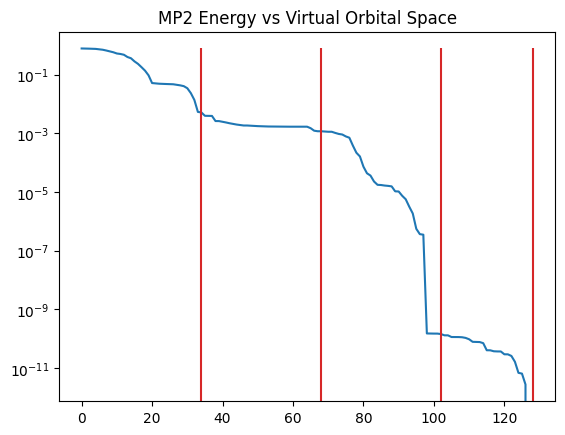

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
energy = np.array([r[0] for r in data["results"]])
print(energy)
energy_error = abs(energy - min(energy))
print(energy_error)
plt.plot(energy_error, color="tab:blue")
plt.yscale("log")
plt.title("MP2 Energy vs Virtual Orbital Space")
plt.vlines([ind - max(mf_embed.mol.nelec) for ind in [48, 82, 116, 142]], ymin=0, ymax=max(energy_error), color="tab:red")

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
energy = np.array(data["results"])
print(energy)
energy_error = abs(energy - min(energy))
print(energy_error)
converged_results = energy_error[data["converged"]]
unconverged_results = energy_error[np.bitwise_not(data["converged"])]
print(energy_error[:-1])
plt.plot(np.arange(0,len(converged_results)), converged_results, color="tab:blue")
plt.plot(np.arange(len(converged_results), len(converged_results) + len(unconverged_results)), unconverged_results, color="tab:red")
plt.yscale("log")

ValueError: min() arg is an empty sequence

[6.48223022e-08 4.03988452e-08 1.62438027e-08 1.61350044e-08
 1.58516968e-08 1.56089754e-08 1.54094550e-08 1.53653446e-08
 1.52874691e-08 1.40629481e-08 7.58507213e-09 7.20024218e-09
 6.82382506e-09 1.89061211e-10]


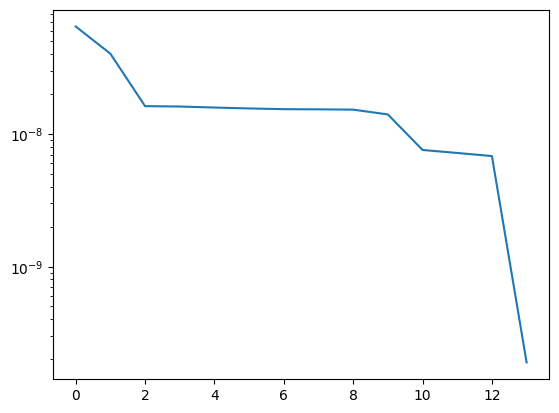

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
energy = np.array(data["results"])
converged_results = energy[data["converged"]]
energy_error = np.abs(converged_results - min(converged_results))[:-1]
print(energy_error)
plt.plot(np.arange(0,len(energy_error)), energy_error, color="tab:blue")
plt.yscale("log")

In [ ]:
from pyscf import cc
ccsd = cc.CCSD(mf_embed, frozen=[0,1,2,3,4]+[*range(32, mf_embed.mol.nao)])
ccsd.run()
ccsd = cc.CCSD(mf_embed, frozen=[*range(32, mf_embed.mol.nao)])
ccsd.run()

E(UCCSD) = -1004.339535153026  E_corr = -6.888764718540948e-07
E(UCCSD) = -1004.339535239557  E_corr = -7.754072092091179e-07


In [ ]:
# import json
# with open("singlet.json", "w+") as f:
#     json.dump([r[0] for r in data["results"]], f)